In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
train_dir = "cifar10/train/"
test_dir = "cifar10/test/"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [4]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [5]:
for layer in base_model.layers:
   layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 [==============================] - 95s 1s/step - loss: 1.9857 - accuracy: 0.2848 - val_loss: 1.6356 - val_accuracy: 0.4470
Epoch 2/10
79/79 [==============================] - 96s 1s/step - loss: 1.5998 - accuracy: 0.4450 - val_loss: 1.4627 - val_accuracy: 0.4690
Epoch 3/10
79/79 [==============================] - 91s 1s/step - loss: 1.4723 - accuracy: 0.4788 - val_loss: 1.4119 - val_accuracy: 0.5040
Epoch 4/10
79/79 [==============================] - 87s 1s/step - loss: 1.3703 - accuracy: 0.5222 - val_loss: 1.3860 - val_accuracy: 0.5090
Epoch 5/10
79/79 [==============================] - 89s 1s/step - loss: 1.3146 - accuracy: 0.5376 - val_loss: 1.3821 - val_accuracy: 0.5000
Epoch 6/10
79/79 [==============================] - 92s 1s/step - loss: 1.2726 - accuracy: 0.5564 - val_loss: 1.3603 - val_accuracy: 0.5080
Epoch 7/10
79/79 [==============================] - 89s 1s/step - loss: 1.1869 - accuracy: 0.5880 - val_loss: 1.3633 - val_accuracy: 0.5290
Epoch 8/10
79/79 [==

In [8]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 [==============================] - 250s 3s/step - loss: 1.8816 - accuracy: 0.2976 - val_loss: 1.3777 - val_accuracy: 0.5130
Epoch 2/10
79/79 [==============================] - 244s 3s/step - loss: 1.3630 - accuracy: 0.5084 - val_loss: 1.2589 - val_accuracy: 0.5660
Epoch 3/10
79/79 [==============================] - 224s 3s/step - loss: 1.0790 - accuracy: 0.6304 - val_loss: 1.1454 - val_accuracy: 0.6100
Epoch 4/10
79/79 [==============================] - 213s 3s/step - loss: 0.9208 - accuracy: 0.6902 - val_loss: 1.3041 - val_accuracy: 0.5820
Epoch 5/10
79/79 [==============================] - 245s 3s/step - loss: 0.8216 - accuracy: 0.7196 - val_loss: 1.0968 - val_accuracy: 0.6530
Epoch 6/10
79/79 [==============================] - 232s 3s/step - loss: 0.7143 - accuracy: 0.7674 - val_loss: 1.1331 - val_accuracy: 0.6220
Epoch 7/10
79/79 [==============================] - 234s 3s/step - loss: 0.6182 - accuracy: 0.7946 - val_loss: 1.3615 - val_accuracy: 0.6340
Epoch 8/10
79

In [9]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 [==============================] - 20s 586ms/step


In [10]:
labels = list(test_generator.class_indices.keys())

Preditcted:  horse
Actual:  horse


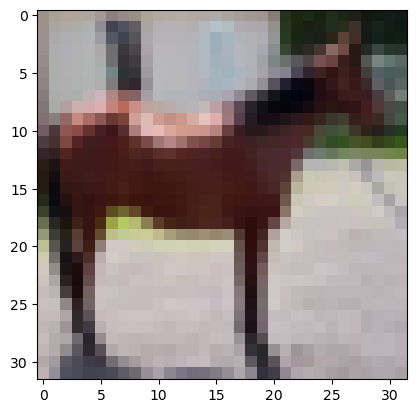

In [11]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])